In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lombardi.data
import lombardi.stats
import lombardi.plot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
x = np.linspace(0, 300, 1000)
metric = 'rushing_yds'

players = [
    'Todd Gurley',
    'Adrian Peterson',
    'Jamaal Charles',
    'LeSean McCoy',
    'Eddie Lacy',
    'Matt Forte',
    'DeMarco Murray',
    'LeGarrette Blount',
]

distributions = []
for player in players:
    data = lombardi.data.player_metric(player, metric)    
    distributions.append({
            'name': player,
            'pdf': lombardi.stats.fit_gamma(x, data, normalize=True)[1],
            'cdf': lombardi.stats.cdf(x, data)[1]
        })

In [60]:
def compare_players(player1, player2):
    f, axarr = plt.subplots(2, figsize=(20, 20))
    axarr[0].set_title('pdf', size=20)
    axarr[1].set_title('cdf', size=20)
    axarr[0].plot(x, player1['pdf'], label=player1['name'])
    axarr[0].plot(x, player2['pdf'], label=player2['name'])
    axarr[1].plot(x, player1['cdf'], label=player1['name'])
    axarr[1].plot(x, player2['cdf'], label=player2['name'])
    axarr[0].legend()
    axarr[1].legend()

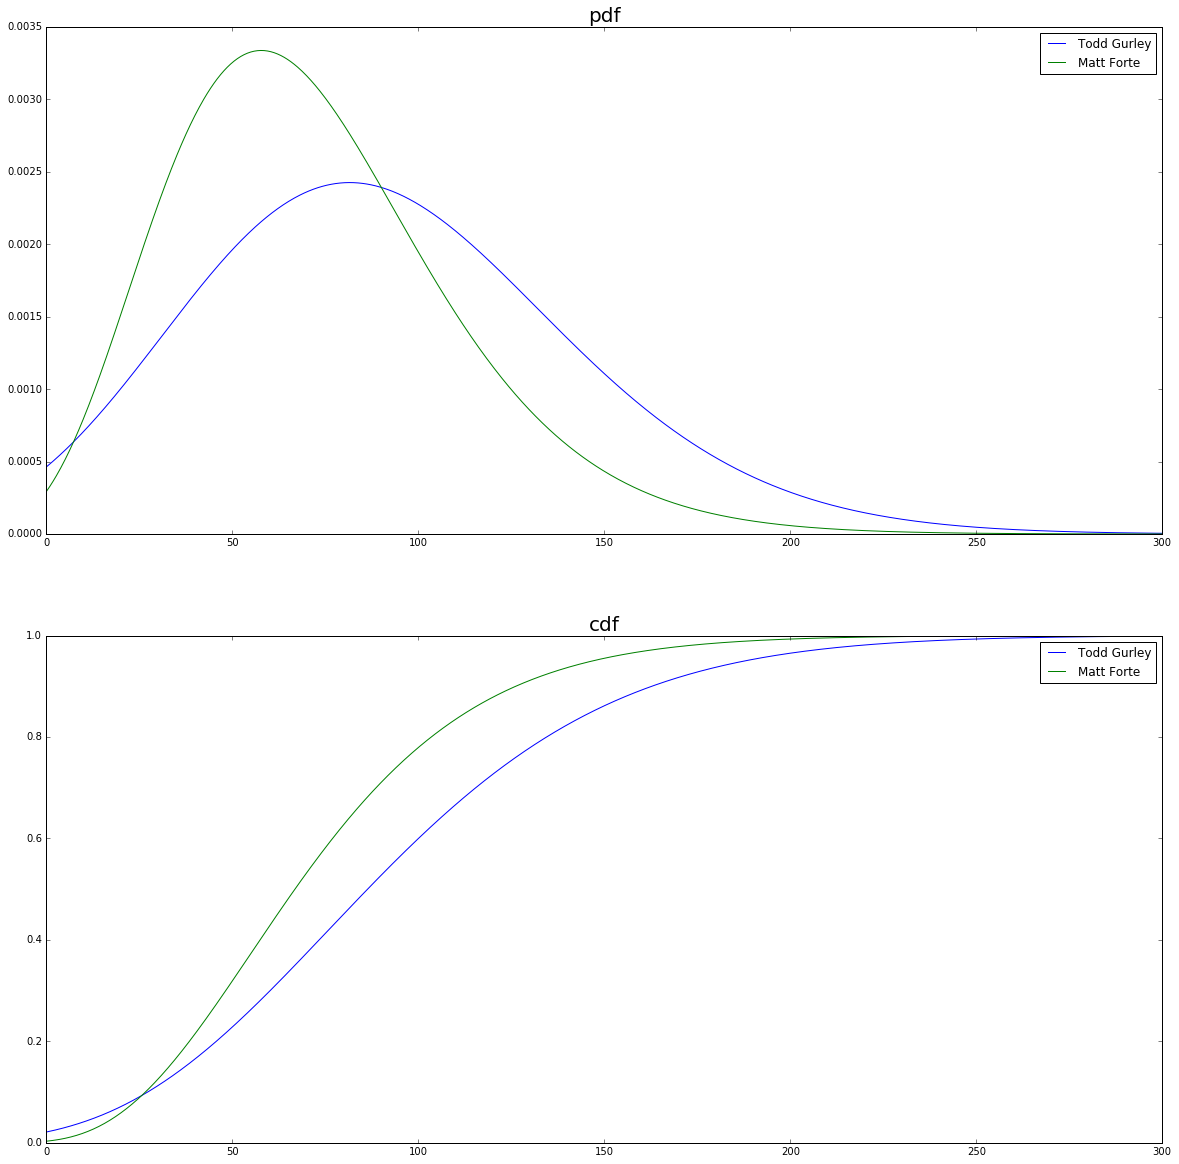

In [61]:
compare_players(distributions[0], distributions[5])

In [62]:
def idx(yards):
    return int(float(yards) * (1000-1)/300)

In [63]:
def p(cdf, yds1, yds2):
    return cdf[idx(yds2)] - cdf[idx(yds1)]

In [64]:
p(distributions[5]['cdf'], 100, 150)

0.17571397609231199

In [65]:
probs = []
for i in range(6):
    probs.append({
            player['name']: p(player['cdf'], i*50, 50*(i+1))
            for player in distributions
        })
df = pd.DataFrame(probs)

In [66]:
df

,Adrian Peterson,DeMarco Murray,Eddie Lacy,Jamaal Charles,LeGarrette Blount,LeSean McCoy,Matt Forte,Todd Gurley
0,0.179298,0.304063,0.271804,0.274842,0.541410,0.283965,0.314290,0.205969
1,0.400728,0.392296,0.469498,0.401290,0.317560,0.425799,0.461814,0.372540
2,0.276439,0.197904,0.201236,0.212952,0.099408,0.205868,0.175714,0.261261
3,0.104407,0.071064,0.028404,0.076299,0.026713,0.059436,0.038149,0.104190
4,0.026891,0.020975,0.001565,0.021762,0.006541,0.012549,0.006003,0.027912
5,0.005497,0.005611,0.000041,0.005509,0.001550,0.002219,0.000793,0.005767


In [67]:
data1 = lombardi.data.player_metric('DeMarco Murray', 'rushing_yds')
data1[36:53]

[51,
 118,
 167,
 100,
 149,
 136,
 115,
 128,
 141,
 79,
 100,
 121,
 73,
 179,
 81,
 58,
 100]

In [68]:
start_idx = 36
num_pts = 16
weights = np.linspace(1, 2, num_pts)

In [69]:
yds = data1[start_idx:start_idx + num_pts]
yds_weighted = lombardi.stats.weight_data(yds, weights)

print sorted(yds)
print sorted(yds_weighted)

[51, 58, 73, 79, 81, 100, 100, 115, 118, 121, 128, 136, 141, 149, 167, 179]
[34, 78, 80, 84, 85, 88, 105, 108, 112, 122, 126, 127, 127, 141, 145, 225]


In [70]:
x = np.linspace(0, 300, 1000)
_, pdf = lombardi.stats.fit_gamma(x, yds)
_, pdf_norm = lombardi.stats.fit_gamma(x, yds_weighted)

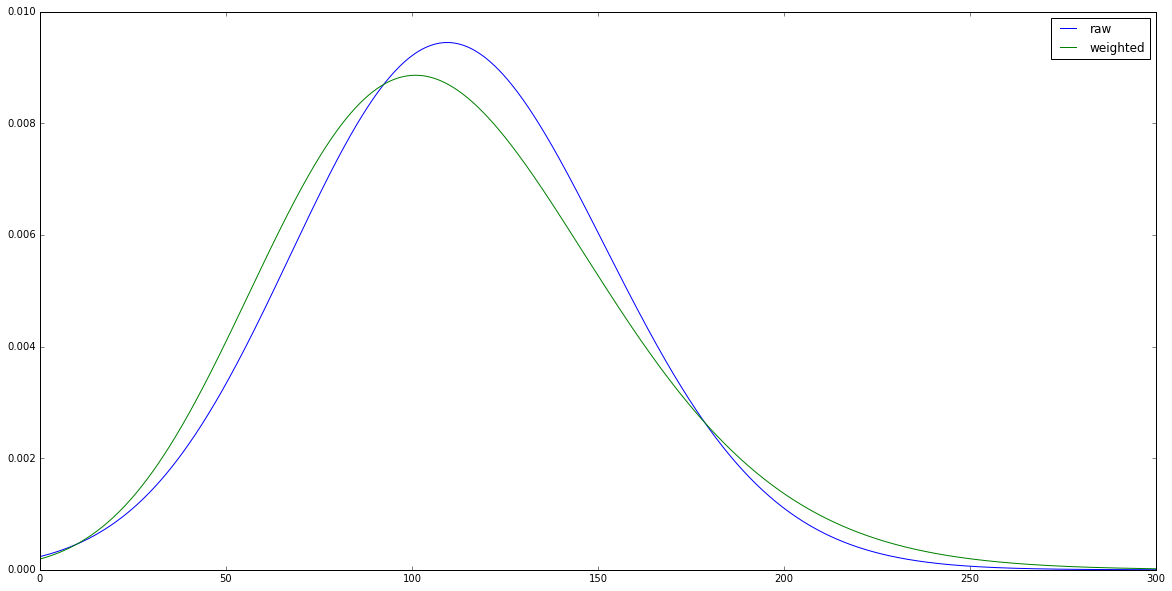

In [71]:
figure = plt.figure(figsize=(20,10))
plt.plot(x, pdf, label='raw')
plt.plot(x, pdf_norm, label='weighted')
plt.legend()

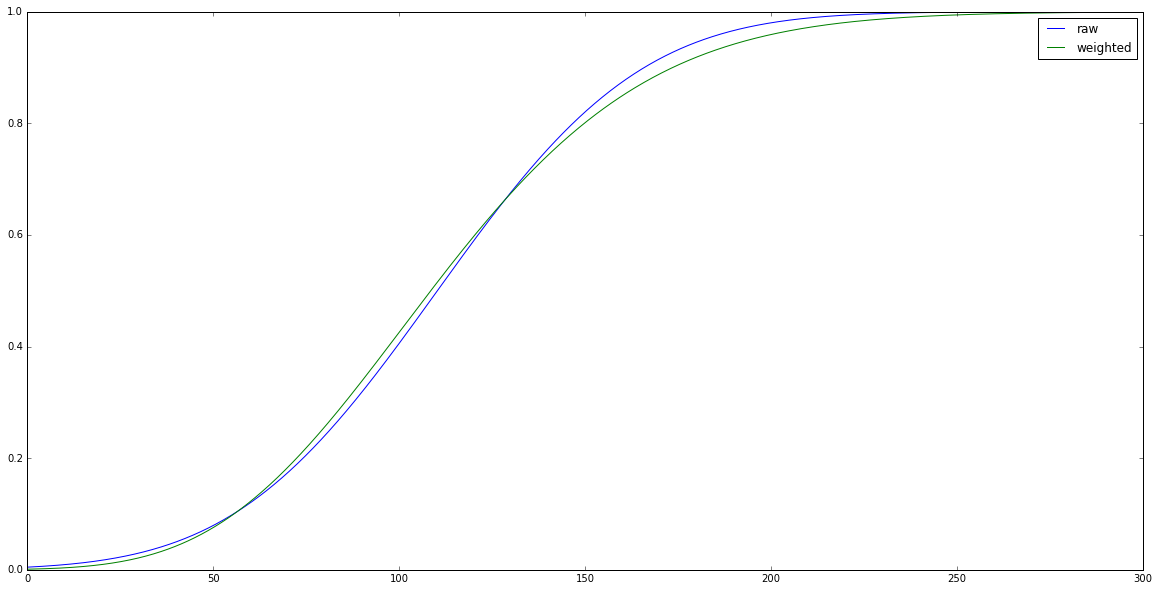

In [72]:
figure = plt.figure(figsize=(20,10))
plt.plot(x, lombardi.stats.cdf(x, yds)[1], label='raw')
plt.plot(x, lombardi.stats.cdf(x, yds_weighted)[1], label='weighted')
plt.legend()

16


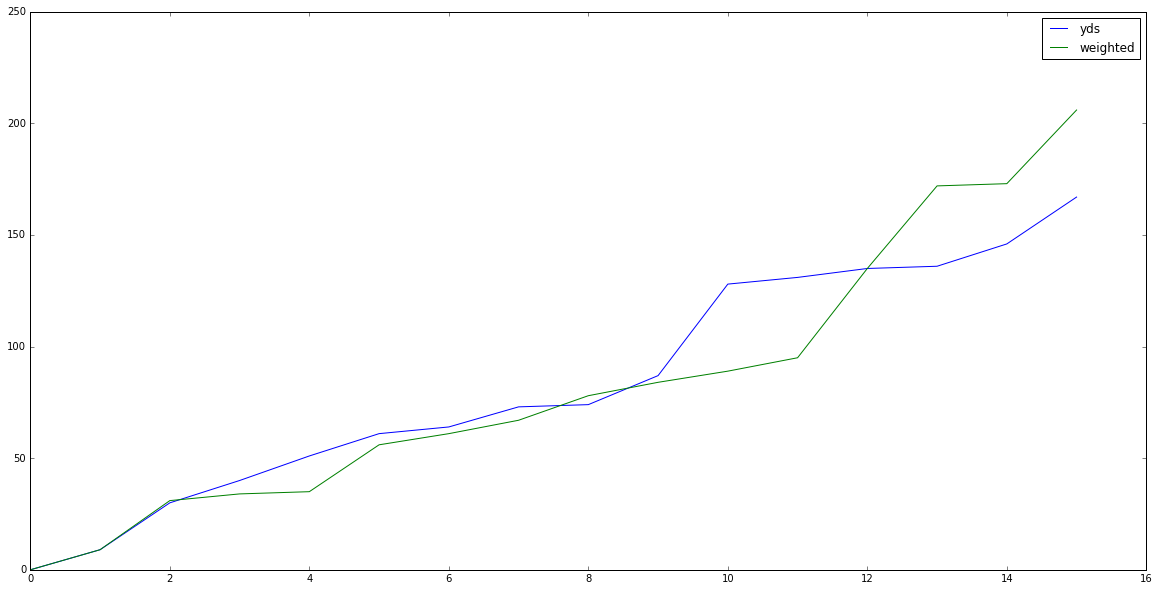

In [37]:
figure = plt.figure(figsize=(20,10))
plt.plot(range(16), sorted(yds), label='yds')
plt.plot(range(16), sorted(yds_weighted), label='weighted')
plt.legend()